# Data Science Challenge - Model

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
dfC = pd.read_csv('dataset/clients.csv', index_col=0)
dfE = pd.read_csv('dataset/editors.csv', index_col=0)
dfTa = pd.read_csv('dataset/tasks.csv', index_col=0)
dfTi = pd.read_csv('dataset/tickets.csv', index_col=0)

In [4]:
# Rename column names
dfC.rename(columns={'id': 'client_id'}, inplace=True)
dfE.rename(columns={'id': 'editor_id'}, inplace=True)
dfTa.rename(columns={'id': 'task_id'}, inplace=True)
dfTi.rename(columns={'id': 'ticket_id', 'number_words': 'total_number_words'}, inplace=True)
# Fix error with duplicated column name
dfTi = dfTi.rename(columns={'client_id': 'unknown'})
dfTi = dfTi.rename(columns={'client_id.1': 'client_id'})

In [5]:
print("Clients")
display(dfC.head())
print("Editors")
display(dfE.head())
print("Tasks")
display(dfTa.head())
print("Tickets")
display(dfTi.head())

Clients


,client_id,domain,category
226,8171ce8697ccbc42991a2eca38cbdee8f96fd794701aa1...,ecommerce,Medium
292,203f6f43688c9abe2e66df55828826f1e04815fa1bf289...,ecommerce,Small
90,896eaafb9691dd3992336145e0b80bb71fdcded7fca603...,health_care,Enterprise
373,84506a2e169143888f4e1c7afe5bc52699ca5cf1b6cc2e...,fintech,Enterprise
273,19388f0b6133ef2085e26dfc50b046836f9aada571cbd8...,fintech,Enterprise


Editors


,editor_id,travel,fintech,ecommerce,sports,gamming,health_care
0,dd2a4a379c04b944834c66cc797815f0f6b01c10858e8b...,2,4,4,2,5,3
2,2f5da6e9921baa794759ee9f4b362555bcb3c1646eb51f...,3,3,4,5,3,5
5,534599df3b467cfe814e0a4a979cc9726b64d189247e92...,4,3,1,2,1,4
6,2f8308ae8b2b2f57f17d96c86457b4f219242999399697...,3,2,5,5,3,1
18,9865f5293dce01180593e9329dff57a1ac9a41d33afef7...,3,2,4,4,4,5


Tasks


,task_id,number_words,sequence_number,ticket_id
0,L139WPBDIEJG4PD2FOAWDMGC0XLFVEJO,40,1,C05739545
1,QKADER8M3USE69QGU1DPZRVAUZX8WDJI,40,2,C05739545
2,7FA5ED3SSU5QC2TNBX1Y3TOZDDVJ60ZY,40,3,C05739545
3,AUGNZGL3HUUKQICO2URO4VBA6TJPC1SI,22,4,C05739545
4,D3DUPMUSC7ZOX9DD3G8NP2CPUWNRH835,40,1,C05739547


Tickets


,ticket_id,unknown,total_number_words,tone,language_pair,quality_score,price,client_id
0,C05739545,87.0,142,informal,pt_en,-1,-1,587fb1667c89615c53088cce45b602cc03ef251bcaf9e0...
2,C05739547,32.0,172,formal,pt_en,-1,-1,a59b8fa90a633fd2902283bfbe4dffa9c06e3420c03df5...
3,C05739550,32.0,344,informal,pt_en,-1,-1,36b322832c268a1fa9e64b30dc6490c6591d4b38ae28d2...
4,C05739554,80.0,1436,informal,fr_de,-1,-1,89225a3eb6c39c319e0175a029402b7d07bfba033fdba2...
5,C05739559,80.0,163,informal,pt_en,-1,-1,896eaafb9691dd3992336145e0b80bb71fdcded7fca603...


In [6]:
# Plotting parameters
domains = ['travel', 'fintech', 'ecommerce', 'sports', 'gamming', 'health_care']
colors = {
    'travel': 'C0',
    'fintech': 'C2',
    'ecommerce': 'C7',
    'sports': 'C1',
    'gamming': 'C4',
    'health_care': 'C3'
}

In [7]:
# Define prior probabilities for each topic
xk = np.arange(1,6)
#
pk_travel, _ = np.histogram(dfE['travel'], bins=np.arange(1,7), density=True)
pk_fintech, _ = np.histogram(dfE['fintech'], bins=np.arange(1,7), density=True)
pk_ecommerce, _ = np.histogram(dfE['ecommerce'], bins=np.arange(1,7), density=True)
pk_sports, _ = np.histogram(dfE['sports'], bins=np.arange(1,7), density=True)
pk_gamming, _ = np.histogram(dfE['gamming'], bins=np.arange(1,7), density=True)
pk_health_care, _ = np.histogram(dfE['health_care'], bins=np.arange(1,7), density=True)
#
priors = {
    'travel': stats.rv_discrete(name='travel', values=(xk, pk_travel)),
    'fintech': stats.rv_discrete(name='fintech', values=(xk, pk_fintech)),
    'ecommerce': stats.rv_discrete(name='ecommerce', values=(xk, pk_ecommerce)),
    'sports': stats.rv_discrete(name='sports', values=(xk, pk_sports)),
    'gamming': stats.rv_discrete(name='gamming', values=(xk, pk_gamming)),
    'health_care': stats.rv_discrete(name='health_care', values=(xk, pk_health_care))
}

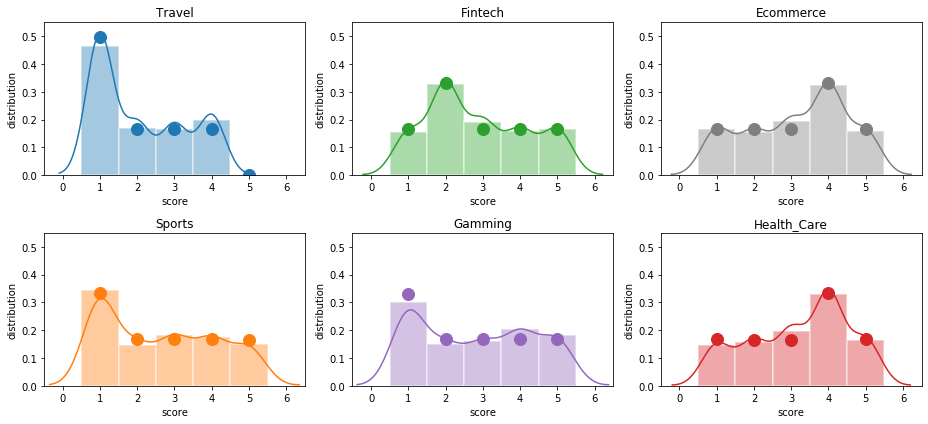

In [8]:
# Plot Prior to make sure we are doing it right. These plots must be the same as in the data-exploration.
fig, (axes) = plt.subplots(nrows=2, ncols=3, figsize=(13,6))
for ax, domain in zip(axes.flatten(), domains):
    prior = priors[domain]
    color = colors[domain]
    # Plot PMF as circles
    ax.plot(xk, prior.pmf(xk), color=color, ms=12, marker='o', lw=0)
    # Plot bars as random estimations
    sns.distplot(prior.rvs(size=500), color=color, ax=ax, bins=np.arange(1,7)-0.5, hist_kws={'linewidth': 2, 'edgecolor':'white'})
    ax.set_title(domain.title())
    ax.set_xlim(-0.5,6.5)
    ax.set_ylim(0,0.55)
    ax.set_ylabel('distribution')
    ax.set_xlabel('score')
plt.tight_layout()

In [9]:
# Left Join (Tickets on Tasks) Left Join (Clients on Tickets)
# Keeping original ids from tables
dfjoin = dfTa.set_index('ticket_id').join(dfTi.set_index('ticket_id')).\
        reset_index().\
        set_index('client_id').\
        join(dfC.set_index('client_id')).\
        reset_index().\
        set_index('task_id')
display(dfjoin)

,client_id,ticket_id,number_words,sequence_number,unknown,total_number_words,tone,language_pair,quality_score,price,domain,category
task_id,,,,,,,,,,,,
7XPBD5M3FLU54SFHXLXKCORVLCX1KOBO,025c229043c3328605b2ac13096f619a48991da8776769...,C05739638,40,1,80.0,580,informal,nl_en,-1,-1,travel,Medium
5WJLDF7GMN1YUDFEFXJ6TPW4TT44CH3M,025c229043c3328605b2ac13096f619a48991da8776769...,C05739638,40,2,80.0,580,informal,nl_en,-1,-1,travel,Medium
53ARJ718YT2CQGUJLLBSO91MW6DBEFVW,025c229043c3328605b2ac13096f619a48991da8776769...,C05739638,40,3,80.0,580,informal,nl_en,-1,-1,travel,Medium
TV364UWKUEIE26XBT8PLRYJUCBJHIKZE,025c229043c3328605b2ac13096f619a48991da8776769...,C05739638,40,4,80.0,580,informal,nl_en,-1,-1,travel,Medium
JQ7QQFEFXC044R7I1P3R3MPJYHSDCZ8M,025c229043c3328605b2ac13096f619a48991da8776769...,C05739638,40,5,80.0,580,informal,nl_en,-1,-1,travel,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
UQNOJXHRV7N9B9IR0TMHX3WLN81CTGX4,ff6bbad3f35db0be4a114a56b76622c1d489394c70902f...,C05777104,40,1,81.0,191,informal,nl_en,-1,-1,sports,Enterprise
9VQVF46A8771TP5KC22VXPXO87224175,ff6bbad3f35db0be4a114a56b76622c1d489394c70902f...,C05777104,40,2,81.0,191,informal,nl_en,-1,-1,sports,Enterprise
XQ6KEXVLMIA1ZRUGLNNFZ8X0CDPGEL73,ff6bbad3f35db0be4a114a56b76622c1d489394c70902f...,C05777104,40,3,81.0,191,informal,nl_en,-1,-1,sports,Enterprise


In [20]:
# This model is not ideal. The definition of the distribution in the instructions is not clear.
# A per editor quality prior, based on language pair and topic, with a Gaussian estimated from historica data, would be more appropriate.
dftmp = dfjoin.sample(1000)
def assign_editor(domain):
    # sample one editor randomly
    s = dfE.sample(1).iloc[0]
    return pd.Series({'editor_id':s['editor_id'], 'skill_in_domain':s[domain]})

# Assign an editor with a respetive skill in the domain of the task
dftmp = pd.concat([dftmp, dftmp['domain'].apply(assign_editor)], axis='columns')
def infer_quality(row):
    domain = row['domain']
    skill_in_domain = row['skill_in_domain']
    prior = priors[domain].rvs(1)
    return prior
dftmp['random_quality'] = dftmp.apply(infer_quality, axis='columns')

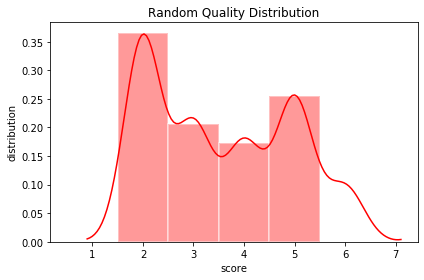

In [27]:
# Plot a model of random quality.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
# Plot PMF as circles
sns.distplot(dftmp['random_quality'], color='red', ax=ax, bins=np.arange(1,7)-0.5, hist_kws={'linewidth': 2, 'edgecolor':'white'})
ax.set_title('Random Quality Distribution')
#ax.set_xlim(-0.5,6.5)
#ax.set_ylim(0,0.55)
ax.set_ylabel('distribution')
ax.set_xlabel('score')
plt.tight_layout()